# Project: Exploring World Human Development Index - HDI  (Gapminder data)
by [Bernardo Romero](mailto:romero.bernardo@gmail.com)
August 2018

<img src="https://www.utoronto.ca/sites/default/files/2017-07-05-faces.jpg" style="width: 600px;"/>

<a id='contents'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>


<a id='intro'></a>
## Introduction

The Human Development Index (HDI) is a widely-used indicator for the welfare of a society. It is produced by the United Nations Development Program (UNDP) on a yearly basis since 1990 and is an alternative to the traditional economic growth approach (GDP) to development. The index summarizes the current situation of a country's achievements in education (years of schooling), health (live expectancy) and overall economic situation (gross national income per capita). By exploring the change in the HDI we could have an idea whether the world's population is in an overall better or worse situation as it was 15 years ago. 

HDI was initially proposed by the Pakistani economist Mahbub ul Haq and UNDP has taken ownership of the indicator's production and the publication of its results. The official site for the HDI can be accesed <a href="http://hdr.undp.org/en/faq-page/human-development-index-hdi">here</a> and for this project the data was retrieved from <a href="https://www.gapminder.org/data/">Gapminder</a>, a repository of economic and societal data at the country level.

A [criticism](http://hdr.undp.org/sites/default/files/hdrp_2010_35.pdf) to the HDI is that it does not take into account a country's economic inequality and that it does not relflect a country's economic insertion to the world. Furthermore, it doesn't take into account ecological footprint, which unfortunaltely seems to be positively related to a country's higher HDI. To test for these shortcomings, this project looks for relationships between the HDI and further Gapminder data about foreign direct investment (FDI) flows, CO2 emissions and inequality, as represented by a country's <a href="https://en.wikipedia.org/wiki/Gini_coefficient">GINI coefficient</a>. The data was retrieved from the Gapminder repositories in August 2018.

By using Exploratory Data Analysis with the pandas, numpy and matplotlib python libraries, this project will try to respond to the following questions:

1. According to the HDI, are people in more countries living in better conditions in 2015 than in 2000? in which proportion?
2. Is the average Human Development improving? by how much?
3. Which country and region improved the most between 2000 and 2015? Which one improved the least?
4. What features are associated with higher HDI (FDI, CO2 emissions, inequality)?


In [1]:
# pandas, builtover the numpy library, provides the necessary tools for exploratory data analysis with python, 
# whereas matplotlib provides the plotting and charting capabilities to analyse and communicate the results

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
We start by importing four datafiles with the HDI index, GINI, FDI and CO2 emission data. Additionally, we import a general reference geography file for segmentation purposes. 

In [2]:
# import the file with the HDI data and check its structure

hdi_df = pd.read_csv('hdi_human_development_index.csv')
hdi_df.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [3]:
# import the data with GINI index by country and check its structure
gini_df = pd.read_csv('inequality_index_gini.csv')
gini_df.head()

,geo,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,...,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5


In [4]:
# import the data with foreign direct investment flows (inward) by country and check its structure
fdi_df = pd.read_csv('foreign_direct_investment_net_inflows_percent_of_gdp.csv')
fdi_df.head()


,geo,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0132,0.0246,0.0094,0.0156,NaN,NaN,0.00157,-0.00813,NaN,...,1.92,0.452,1.58,0.34,0.321,0.230,0.186,0.211,0.849,0.44
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.10,9.680,11.10,9.14,8.130,7.450,9.820,8.690,8.730,8.80
2,Algeria,1.6500,0.0118,0.6140,0.5850,2.71,0.765,1.05000,0.85100,0.513,...,1.25,1.540,2.00,1.43,1.290,0.718,0.807,0.703,-0.243,1.03
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.48,1.990,2.92,-3.91,-2.900,-5.980,-5.700,1.520,9.020,4.31
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.84000,-7.850,...,25.80,11.600,6.59,8.39,5.710,10.700,11.300,3.360,7.050,3.35


In [5]:
# import the data with CO2 emissions by country and check its structure
emissions_df = pd.read_csv('co2_emissions_tonnes_per_person.csv')
emissions_df.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [6]:
# The data files imported don't provide country groupings by region. To be able to summarize results by region we also import 
# a 'geographies' file retreieved from gapminder (https://www.gapminder.org/data/geo/)  

geography = pd.read_csv('geographies.csv')
geography.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19.11.1946,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14.12.1955,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8.10.1962,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28.7.1993,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1.12.1976,Sub-Saharan Africa,Lower middle income


We now check the shape of each file:

In [7]:
# we find out the structure of each dataframe (number of rows and columns)

print("Structure of hdi_df: " + str(hdi_df.shape))
print("Structure of emissions_df: " + str(emissions_df.shape))
print("Structure of gini_df: " + str(gini_df.shape))
print("Structure of fdi_df: " + str(fdi_df.shape))

Structure of hdi_df: (187, 27)
Structure of emissions_df: (192, 216)
Structure of gini_df: (163, 39)
Structure of fdi_df: (188, 48)


The shape of the datafiles is quite different in terms of the years for which data is available, with one having data for as far back as 1800 and other only since 1990. Because the research questions are raised for a timeframe starting in 2000, columns referring to previous years will be dropped. The file structure is similar in that each row describes data for one given country, which makes duplicated information very unlikely. 

We now check for duplicate data:

In [8]:
# Checking for possible duplicates
sum(hdi_df.duplicated()), sum(gini_df.duplicated()), sum(fdi_df.duplicated()), sum(emissions_df.duplicated())


(0, 0, 0, 0)

As shown above, we confirm that no duplicates exist in the datasets. We now verify for missing information and accuracy of datatypes:

In [9]:
# each dataset is checked for datatypes

print("\nhdi_df"), hdi_df.info()
print("\ngini_df: "), gini_df.info()
print("\nfdi_df: "), fdi_df.info()
print("\nemissions_df"), emissions_df.info()


hdi_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
geo     187 non-null object
1990    143 non-null float64
1991    143 non-null float64
1992    143 non-null float64
1993    143 non-null float64
1994    143 non-null float64
1995    147 non-null float64
1996    147 non-null float64
1997    147 non-null float64
1998    147 non-null float64
1999    150 non-null float64
2000    167 non-null float64
2001    167 non-null float64
2002    167 non-null float64
2003    169 non-null float64
2004    172 non-null float64
2005    181 non-null float64
2006    181 non-null float64
2007    181 non-null float64
2008    181 non-null float64
2009    181 non-null float64
2010    187 non-null float64
2011    187 non-null float64
2012    187 non-null float64
2013    187 non-null float64
2014    187 non-null float64
2015    187 non-null float64
dtypes: float64(26), object(1)
memory usage: 39.5+ KB

gini_df: 
<class 'pandas.core.frame.DataFrame'>
Ra

(None, None)

The results above show that the datatypes are homogenous for every dataset and dont't need to be modified, however many datapoints have missing information that will need to be corrected.


### Data Cleaning
According to the initial checking of the data, some columns need to be dropped and missing information need to be corrected. Finally, we want to rename the columns and merge all files into one before proceeding with the Exploratory Data Analysis.

Dropping unwanted columns:

In [10]:
# droping the years up to 2000 in the HDI dataframe using its column index
hdi_df.drop(hdi_df.columns[1:11], axis=1, inplace=True)
hdi_df.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.340,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [11]:
# droping the years up to 2000 in the gini dataframe using its column index
gini_df.drop(gini_df.columns[1:22], axis=1, inplace=True)
gini_df.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,51.1,53.3,53.8,50.7,48.3,47.7,46.6,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4
4,Armenia,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5


In [12]:
# droping the years up to 2000 in the FDI dataframe using its column index
fdi_df.drop(fdi_df.columns[1:31], axis=1, inplace=True)
fdi_df.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,0.0276,1.21,1.26,3.54,4.32,3.3700,1.92,0.452,1.58,0.34,0.321,0.230,0.186,0.211,0.849,0.44
1,Albania,3.940,5.1000,3.04,3.10,4.67,3.22,3.6200,6.10,9.680,11.10,9.14,8.130,7.450,9.820,8.690,8.730,8.80
2,Algeria,0.511,2.0300,1.88,0.94,1.03,1.12,1.5700,1.25,1.540,2.00,1.43,1.290,0.718,0.807,0.703,-0.243,1.03
3,Angola,9.620,24.0000,14.00,25.20,11.20,-4.62,-0.0902,-1.48,1.990,2.92,-3.91,-2.900,-5.980,-5.700,1.520,9.020,4.31
4,Antigua and Barbuda,5.190,12.3000,8.09,19.40,8.74,21.60,31.0000,25.80,11.600,6.59,8.39,5.710,10.700,11.300,3.360,7.050,3.35


In [13]:
# droping the years up to 2000 in the CO2 emissions dataframe, using its column index
emissions_df.drop(emissions_df.columns[1:201], axis=1, inplace=True)
emissions_df.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,8.0200,7.790,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


We must now resolve the missing data in the dataframes. For the HDI,there are 20 countries with missing data. This NaN should not be interpolated row by row (they are different countries) and column by column is not possible when the NaN are all located at the left most columns. We will exclude those countries from the analysis.

In [14]:
# dropping the rows with missing information
hdi_df.dropna(inplace=True)
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 186
Data columns (total 17 columns):
geo     167 non-null object
2000    167 non-null float64
2001    167 non-null float64
2002    167 non-null float64
2003    167 non-null float64
2004    167 non-null float64
2005    167 non-null float64
2006    167 non-null float64
2007    167 non-null float64
2008    167 non-null float64
2009    167 non-null float64
2010    167 non-null float64
2011    167 non-null float64
2012    167 non-null float64
2013    167 non-null float64
2014    167 non-null float64
2015    167 non-null float64
dtypes: float64(16), object(1)
memory usage: 23.5+ KB


The summary above shows that there is no longer missing information in the dataframe. We will use this dataframe to answer the first two questions. 

In [15]:
# rename GINI columns
gini_df.rename(columns= lambda x: x + "_gini", inplace=True)
gini_df.head()

,geo_gini,2000_gini,2001_gini,2002_gini,2003_gini,2004_gini,2005_gini,2006_gini,2007_gini,2008_gini,2009_gini,2010_gini,2011_gini,2012_gini,2013_gini,2014_gini,2015_gini,2016_gini
0,Albania,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.6,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,51.1,53.3,53.8,50.7,48.3,47.7,46.6,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4
4,Armenia,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5


In [16]:
# rename FDI columns
fdi_df.rename(columns= lambda x: x + "_fdi", inplace=True)
fdi_df.head()

,geo_fdi,2000_fdi,2001_fdi,2002_fdi,2003_fdi,2004_fdi,2005_fdi,2006_fdi,2007_fdi,2008_fdi,2009_fdi,2010_fdi,2011_fdi,2012_fdi,2013_fdi,2014_fdi,2015_fdi,2016_fdi
0,Afghanistan,NaN,0.0276,1.21,1.26,3.54,4.32,3.3700,1.92,0.452,1.58,0.34,0.321,0.230,0.186,0.211,0.849,0.44
1,Albania,3.940,5.1000,3.04,3.10,4.67,3.22,3.6200,6.10,9.680,11.10,9.14,8.130,7.450,9.820,8.690,8.730,8.80
2,Algeria,0.511,2.0300,1.88,0.94,1.03,1.12,1.5700,1.25,1.540,2.00,1.43,1.290,0.718,0.807,0.703,-0.243,1.03
3,Angola,9.620,24.0000,14.00,25.20,11.20,-4.62,-0.0902,-1.48,1.990,2.92,-3.91,-2.900,-5.980,-5.700,1.520,9.020,4.31
4,Antigua and Barbuda,5.190,12.3000,8.09,19.40,8.74,21.60,31.0000,25.80,11.600,6.59,8.39,5.710,10.700,11.300,3.360,7.050,3.35


In [17]:
# rename emissions columns
emissions_df.rename(columns= lambda x: x + "_co2", inplace=True)
emissions_df.head()

,geo_co2,2000_co2,2001_co2,2002_co2,2003_co2,2004_co2,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2
0,Afghanistan,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,8.0200,7.790,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [19]:
# merging the four datasets, using the country name as key.
df_combined1 = pd.merge(hdi_df, gini_df, left_on='geo', right_on='geo_gini')
df_combined2 = pd.merge(df_combined1, fdi_df, left_on='geo', right_on='geo_fdi')
df_combined3 = pd.merge(df_combined2, emissions_df, left_on='geo', right_on='geo_co2')
df_combined3.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2005_co2,2006_co2,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2
0,Albania,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,...,1.38,1.28,1.30,1.46,1.48,1.56,1.79,1.68,1.73,1.96
1,Algeria,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,...,3.22,2.99,3.19,3.16,3.42,3.30,3.29,3.46,3.51,3.72
2,Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,...,0.98,1.10,1.20,1.18,1.23,1.24,1.25,1.33,1.25,1.29
3,Argentina,0.771,0.776,0.770,0.775,0.780,0.782,0.788,0.792,0.794,...,4.14,4.43,4.38,4.68,4.41,4.56,4.60,4.57,4.46,4.75
4,Armenia,0.644,0.645,0.657,0.668,0.679,0.692,0.707,0.721,0.725,...,1.46,1.48,1.73,1.91,1.51,1.47,1.71,1.98,1.90,1.90


In [20]:
# merging the resulting dataset with the geography table. We are interested in the world's division in eight different regions.

df_merged = pd.merge(df_combined3,geography[['name','eight_regions']],left_on='geo', right_on='name', how='left')
df_merged.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2007_co2,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,name,eight_regions
0,Albania,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,...,1.30,1.46,1.48,1.56,1.79,1.68,1.73,1.96,Albania,europe_east
1,Algeria,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,...,3.19,3.16,3.42,3.30,3.29,3.46,3.51,3.72,Algeria,africa_north
2,Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,...,1.20,1.18,1.23,1.24,1.25,1.33,1.25,1.29,Angola,africa_sub_saharan
3,Argentina,0.771,0.776,0.770,0.775,0.780,0.782,0.788,0.792,0.794,...,4.38,4.68,4.41,4.56,4.60,4.57,4.46,4.75,Argentina,america_south
4,Armenia,0.644,0.645,0.657,0.668,0.679,0.692,0.707,0.721,0.725,...,1.73,1.91,1.51,1.47,1.71,1.98,1.90,1.90,Armenia,europe_east


In [21]:
# export file
df_merged.to_csv('gapminder_merged.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: According to the HDI, are people in more countries living in better conditions in 2015 than in 2000? in which proportion? 

In [22]:
# we calculate the change for each country's HDI between 2000 and 2015

df_merged['change_2000_2015'] = df_merged['2015'] - df_merged['2000']
df_merged.head()

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2008_co2,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,name,eight_regions,change_2000_2015
0,Albania,0.662,0.670,0.674,0.681,0.685,0.696,0.703,0.713,0.721,...,1.46,1.48,1.56,1.79,1.68,1.73,1.96,Albania,europe_east,0.102
1,Algeria,0.644,0.653,0.663,0.673,0.680,0.686,0.690,0.697,0.705,...,3.16,3.42,3.30,3.29,3.46,3.51,3.72,Algeria,africa_north,0.101
2,Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,...,1.18,1.23,1.24,1.25,1.33,1.25,1.29,Angola,africa_sub_saharan,0.142
3,Argentina,0.771,0.776,0.770,0.775,0.780,0.782,0.788,0.792,0.794,...,4.68,4.41,4.56,4.60,4.57,4.46,4.75,Argentina,america_south,0.056
4,Armenia,0.644,0.645,0.657,0.668,0.679,0.692,0.707,0.721,0.725,...,1.91,1.51,1.47,1.71,1.98,1.90,1.90,Armenia,europe_east,0.099


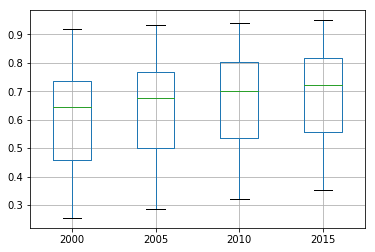

In [23]:
# using boxplots, we compare the HDI data between 2000 and 2015. Visually, an overall improvement of the index is evident
df_merged.boxplot(column=['2000','2005','2010','2015']);

In [24]:
# Counting the positive and negative changes of the Index between 2000 and 2015
df_merged['improved'] = df_merged['change_2000_2015'] > 0
df_merged['improved'].value_counts()

True     146
False      1
Name: improved, dtype: int64

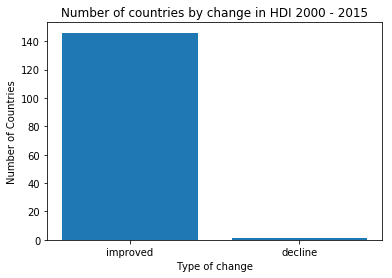

In [25]:
# plotting the number of countries with positive change in the HDI

plt.bar(["improved", "decline"], df_merged['improved'].value_counts())
plt.title("Number of countries by change in HDI 2000 - 2015")
plt.xlabel("Type of change")
plt.ylabel("Number of Countries");

In [26]:
#Almost 100% of the countries improved their HDI. The exact proportion is obtained by a simple division:

146 / 147

0.9931972789115646

<a id='eda'></a>

### Research Question 2: Is the average Human Development improving? by how much?

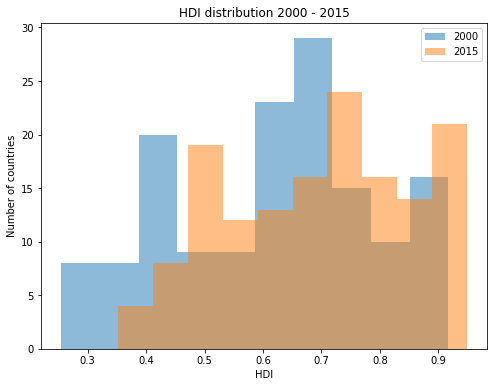

In [27]:
# we plot histograms for the HDI data for 2000 and 2015 to have a general idea of its evolution

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_merged['2000'], alpha=0.5, label="2000")
ax.hist(df_merged['2015'], alpha=0.5, label="2015")
ax.set_title('HDI distribution 2000 - 2015')
ax.set_xlabel('HDI')
ax.set_ylabel('Number of countries')
ax.legend(loc='upper right')
plt.show()

The above histograms show an evident improvement in the index towards better living conditions

In [28]:
# We calculate the HDI mean for 2000 and 2015 

mean_hdi_2000 = df_merged['2000'].mean()
mean_hdi_2015 = df_merged['2015'].mean()
print('The mean HDI in 2000 was: ', mean_hdi_2000)
print('The mean HDI in 2015 was: ', mean_hdi_2015)


The mean HDI in 2000 was:  0.6154149659863947
The mean HDI in 2015 was:  0.6947482993197279


In [30]:
# we calculate the growth of the world's average HDI between 2000 and 2015
(mean_hdi_2015 - mean_hdi_2000)/mean_hdi_2000 *100

12.89103088453119

### Research Question 3: Which country and region improved the most between 2000 and 2015? Which one improved the least?

In [31]:
df_merged.groupby('eight_regions')['2015'].describe()

,count,mean,std,min,25%,50%,75%,max
eight_regions,,,,,,,,
africa_north,5.0,0.656200,0.108946,0.473,0.64700,0.6910,0.72500,0.745
africa_sub_saharan,40.0,0.520250,0.104644,0.352,0.44650,0.4975,0.57525,0.782
america_north,15.0,0.728133,0.109164,0.493,0.66250,0.7300,0.77800,0.920
america_south,11.0,0.745545,0.063062,0.638,0.71000,0.7400,0.78100,0.847
asia_west,16.0,0.665375,0.111827,0.482,0.57375,0.6565,0.74800,0.899
east_asia_pacific,19.0,0.704053,0.121926,0.515,0.62200,0.7040,0.73900,0.939
europe_east,21.0,0.806190,0.053036,0.699,0.76700,0.8020,0.84500,0.895
europe_west,20.0,0.898050,0.030579,0.843,0.87950,0.8975,0.92325,0.949


In [32]:
# we group the data by the eith regions and calculate descriptive statistics
df_merged.groupby('eight_regions')['change_2000_2015'].describe()

,count,mean,std,min,25%,50%,75%,max
eight_regions,,,,,,,,
africa_north,5.0,0.095600,0.019844,0.071,0.07900,0.1010,0.11000,0.117
africa_sub_saharan,40.0,0.094925,0.034899,0.035,0.06875,0.0915,0.11425,0.166
america_north,15.0,0.059933,0.015845,0.029,0.05050,0.0650,0.06750,0.094
america_south,11.0,0.066636,0.016621,0.032,0.05950,0.0690,0.07150,0.095
asia_west,16.0,0.077875,0.046434,-0.053,0.04725,0.0960,0.10950,0.130
east_asia_pacific,19.0,0.085053,0.036959,0.034,0.05600,0.0810,0.11500,0.147
europe_east,21.0,0.086048,0.020314,0.039,0.07000,0.0840,0.10200,0.117
europe_west,20.0,0.054300,0.013557,0.023,0.04550,0.0575,0.06525,0.073


In [33]:
# finding the country that improved the most its HDI between 2000 and 2015
df_merged.sort_values(by="change_2000_2015", ascending=False).head(1)

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,name,eight_regions,change_2000_2015,improved
107,Rwanda,0.332,0.343,0.359,0.371,0.388,0.404,0.424,0.438,0.447,...,0.0577,0.0576,0.0631,0.0683,0.0726,0.074,Rwanda,africa_sub_saharan,0.166,True


In [34]:
# finding the country that performed the worst between 2000 and 2015
df_merged.sort_values(by="change_2000_2015", ascending=True).head(1)

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2009_co2,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,name,eight_regions,change_2000_2015,improved
126,Syria,0.589,0.596,0.599,0.61,0.624,0.636,0.644,0.651,0.648,...,2.99,2.93,2.73,2.19,1.84,1.6,Syria,asia_west,-0.053,False


### Research Question 4: What features are associated with higher HDI (FDI, CO2 emissions, inequality)?

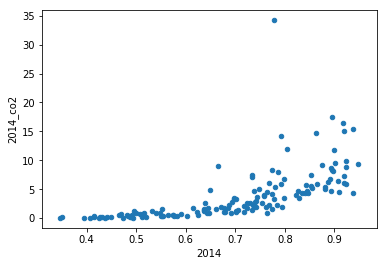

In [35]:
# we build a scatter plot with the last year for which CO2 emissions data is available (2014) and the HDI for that same year
df_merged.plot(y='2014_co2', x='2014', kind='scatter');

In [36]:
# we calculate the pearson correlation
corr_co2 = df_merged[['2014', '2014_co2']].copy()
corr_co2.corr()

,2014,2014_co2
2014,1.000000,0.643021
2014_co2,0.643021,1.000000


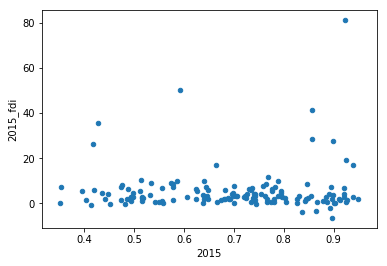

In [37]:
# we build a scatter plot with Foreign Direct Investment data and the HDI index
df_merged.plot(y='2015_fdi', x='2015', kind='scatter');

In [38]:
# we calculate the pearson correlation
corr_fdi  = df_merged[['2015', '2015_fdi']].copy()
corr_fdi.corr()

,2015,2015_fdi
2015,1.000000,0.041107
2015_fdi,0.041107,1.000000


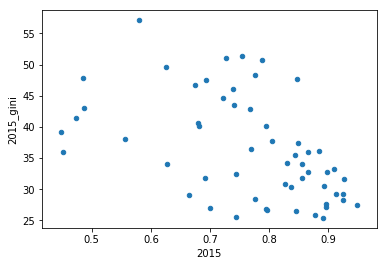

In [39]:
# we build a scatter plot with the gini index (inequality measurement) and the HDI index
df_merged.plot(y='2015_gini', x='2015', kind='scatter');

The GINI coefficient is widely used to measure inequality in an economy (income and wealth). It is expressed from 0 to 1 or in percentages from 0 (total equality) to 100 (total inequality). 

In [40]:
# we calculate the pearson correlation
corr_gini  = df_merged[['2015', '2015_gini']].copy()
corr_gini.corr()

,2015,2015_gini
2015,1.000000,-0.488442
2015_gini,-0.488442,1.000000


<a id='conclusions'></a>
## Conclusions


1. According to the HDI, are people in more countries living in better conditions in 2015 than in 2000? in which proportion?
The Human Development Index has been widely used to describe, in an alternative way to the GDP per capita, the general state of a country's population. Evaluating the data available for the period between 2000 and 2015, we find that almost every country for which data is available (146 out of 147 or 99.3%) has improved the living conditions of its population.   

2. Is the average Human Development improving? by how much?
The Average Human Development index is improving, as found out visually with histograms. The mean HDI grew 12.89% between 2000 and 2015. It is important to note that this calculation excludes 20 countries for which no data was available, most of them considered developing countries.

3. Which country and region improved the most between 2000 and 2015? Which one improved the least?
Rwanda improved the most its HDI between 2000 and 2015, increasing in 0.166. As a region, North Africa improved the most in that period of time, with its mean HDI growing 9.6%. Syria was the only country where the conditions worsen in that period of time, which is explained by the ongoing civil war. As a region, Wester Europe improved the least (5.4%), arguably because of the already high levels of Human Development achieved, but being nonetheless a call for politicians to keep looking for ways to improve the quality of life of its citizens. 

4. What features are associated with higher HDI (FDI, CO2 emissions, inequality)?
High levels of CO2 emissions are strongly correlated to high levels of Human Development, which gives support to the criticism of the composition of the index. The current development path continues to be associated with emissions that cause global warming. The UNDP should indeed take note of this and incorporate good environmental policies and practices as part of the HDI composition. Foreign Direct Investment flows show no correlation to HDI, suggesting that investors are attracted by other factors beyond the general social conditions of its population. The HDI does not consider fdi for its composition and both are not correlated. The correlation between the GINI coeficient and the HDI is moderately strong. Countries with higher HDI tend to be more equal. 

<a id='sources'></a>
## Sources:

- University of Toronto (cover picture)
- https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook
- http://hdr.undp.org/en/content/measurement-inequality-human-development-%E2%80%93-review
- http://hdr.undp.org/en/content/review-hdi-critiques-and-potential-improvements
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html
- https://www.gapminder.org/data/
- https://www.gapminder.org/data/geo/
- http://hdr.undp.org/en/faq-page/human-development-index-hdi

